## Preparação

Procedimento:
- Gerar um campo uniforme de pontos com borda circular centrado no (0,0) com raio 1;
- Alongar x;
- Rotacionar;
- Estimar a matrix de covariancia usando equacao 13;
- Estimar K;

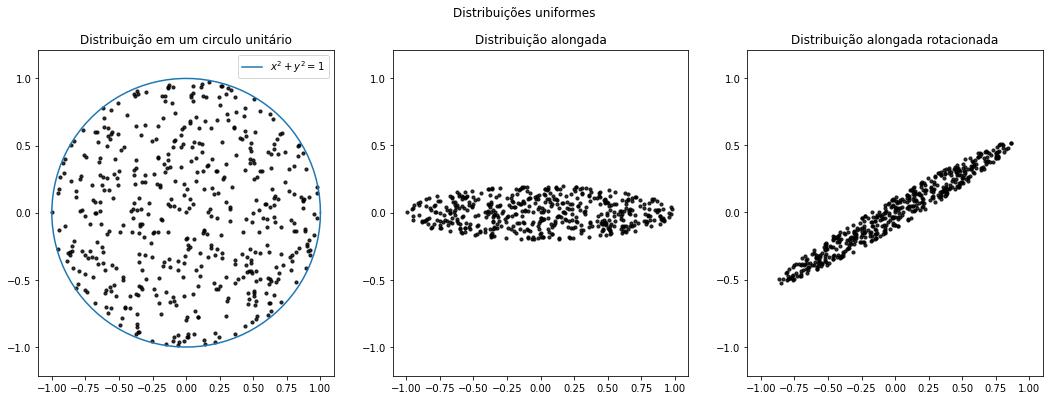

In [15]:
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt

N = 500
circle = [[],[]]
dist_x, dist_y = [], [] 


while len(dist_x) <= N:
    # Gera uma distribuição normal entre [-1,1]
    x,y = np.random.rand(2)*2 -1
    #verifica se o ponto esta num circulo unitário de raio 1
    if x**2+y**2 <=1:
        circle[0].append(x)
        circle[1].append(y)
        dist_x.append(x)
        dist_y.append(y*0.2) 
        
#matriz de rotação         
rot = [[np.cos(np.pi/6), np.sin(np.pi/6)], [np.sin(np.pi/6), np.cos(np.pi/6)]]   
#faz a rotação
result = np.dot(rot, [dist_x,dist_y])

fig, ax = plt.subplots(1, 3, figsize=(6*3, 6), sharex=True)
fig.suptitle("Distribuições uniformes")
ax[0].set_title("Distribuição em um circulo unitário")
ax[1].set_title("Distribuição alongada")
ax[2].set_title("Distribuição alongada rotacionada")

for i in range(3):
    ax[i].axis('equal')

an = np.linspace(0, 2 * np.pi, 100)
ax[0].plot(np.cos(an), np.sin(an), label= "$x^2+y^2=1$")
ax[0].scatter(circle[0],circle[1],color = "black" , alpha = 0.8, s = 10)
ax[1].scatter(dist_x, dist_y, color = "black", alpha = 0.8, s = 10)
ax[2].scatter(result[0], result[1], color = "black", alpha = 0.8, s = 10)
# plt.savefig("images/uniform_dist.png")
ax[0].legend()
plt.show()

---
## Matriz de covariância K e PCA

Matriz de covariância K:
 [[ 2.65256822e-01 -5.55111512e-20]
 [-5.55111512e-20  2.49629923e-03]]



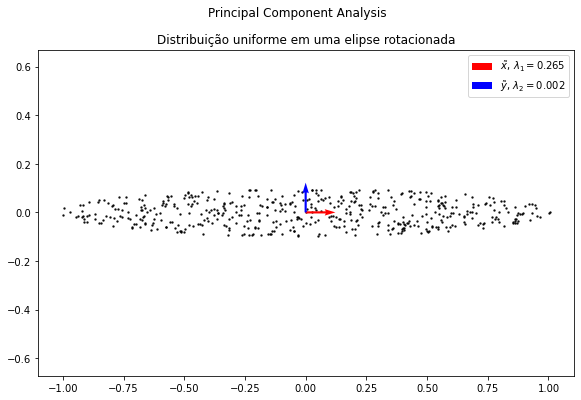

       lambda_1  lambda_2
Valor  0.265257  0.002496

v1 = [1.00000000e+00 2.11261382e-19]
v2 = [0. 1.]


In [21]:
K = np.cov(result)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalue, eigenvector = np.linalg.eig(K)

if eigenvalue[0]<eigenvalue[1]: #garante ordem decrescente para o caso N=2
    eigenvalue[::-1]
    eigenvector[::-1]
    if (len(eigenvalue)>2):
        print("Sort Error")

#plot
fig, ax = plt.subplots(1, 1, figsize=(9.6, 6))
fig.suptitle("Principal Component Analysis")
ax.set_title("Distribuição uniforme em uma elipse rotacionada")
ax.axis('equal')
ax.scatter(result[0], result[1], color = "black", alpha = 0.8, s = 2)
ax.quiver(*[0,0], *eigenvector[:,0], width = 0.004, color = "red", label= "$\~x $, $\lambda_1 = %.3f$"%eigenvalue[0])
ax.quiver(*[0,0], *eigenvector[:,1], width = 0.004, color = "blue", label= "$\~y  $, $\lambda_2 = %.3f$"%eigenvalue[1])
plt.legend()
plt.show()

lambdas = {"lambda_1":eigenvalue[0],"lambda_2":eigenvalue[1]}
print(pd.DataFrame(lambdas, index = ["Valor"]))
print()
print("v1 = %s\nv2 = %s" %(eigenvector[0],eigenvector[1]))

---
### Mudança de Base

Para visualizar a distribuição nos eixos do PCA, que são os eixos de maior variação, fazemos o produto escalar da distribuição com os autovetores encontrados:
 

Matriz de covariância K:
 [[ 2.65256822e-01 -5.55111512e-20]
 [-5.55111512e-20  2.49629923e-03]]



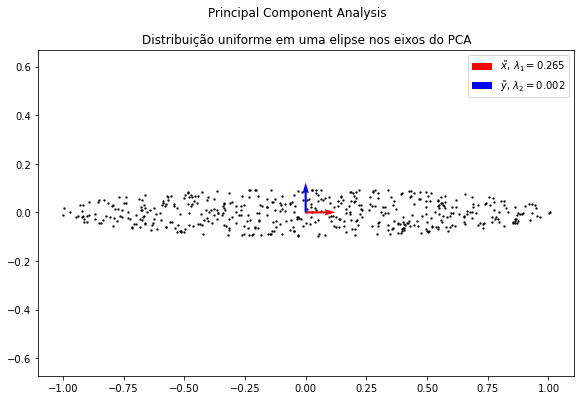

       lambda_1  lambda_2
Valor  0.265257  0.002496

v1 = [1.00000000e+00 2.11261382e-19]
v2 = [0. 1.]


In [20]:
K = np.cov(result)
print("Matriz de covariância K:\n %s\n"%K)
eigenvalue, eigenvector = np.linalg.eig(K)

if eigenvalue[0]<eigenvalue[1]: #garante ordem decrescente para o caso N=2
    eigenvalue[::-1]
    eigenvector[::-1]
    if (len(eigenvalue)>2):
        print("Sort Error")

# Mudança de base 
result = np.dot(eigenvector.T, result)

#plot
fig, ax = plt.subplots(1, 1, figsize=(9.6, 6))
fig.suptitle("Principal Component Analysis")
ax.set_title("Distribuição uniforme em uma elipse nos eixos do PCA")
ax.axis('equal')
ax.scatter(result[0], result[1], color = "black", alpha = 0.8, s = 2)
ax.quiver(*[0,0], *eigenvector[:,0], width = 0.004, color = "red", label= "$\~x $, $\lambda_1 = %.3f$"%eigenvalue[0])
ax.quiver(*[0,0], *eigenvector[:,1], width = 0.004, color = "blue", label= "$\~y  $, $\lambda_2 = %.3f$"%eigenvalue[1])
plt.legend()
plt.show()

lambdas = {"lambda_1":eigenvalue[0],"lambda_2":eigenvalue[1]}
print(pd.DataFrame(lambdas, index = ["Valor"]))
print()
print("v1 = %s\nv2 = %s" %(eigenvector[0],eigenvector[1]))